In [2]:
import pandas as pd
import os
import numpy as np
from pymystem3 import Mystem
import re

In [3]:
m = Mystem()

In [3]:
def lemma(text):
    # delete numbers, punctuation
    # basterd
    # delete '\n'
    #t = text
    #text = text.lower()
    text = re.sub('[^a-zа-яё]', '', text)
    
    text = m.lemmatize(text)[:-1]
    return ''.join(text)

In [35]:
def is_bastard(text):
    analysis = m.analyze(text)
    try:
        if 'qual' in analysis[0]['analysis'][0]:
            return True
        else:
            return False
    except KeyError:
        return 'non_word'
    except IndexError:
        return 'non_word'

In [189]:
os.listdir('.')

['[Vaclav_Brezina]_Statistics_in_Corpus_Linguistics_(z-lib.org).pdf',
 '.DS_Store',
 'ngram_stats.csv',
 'get_ngrams-Copy1.ipynb',
 'unigrams_d.tsv',
 'norm.csv',
 'get_ngrams.ipynb',
 'df_new.csv',
 '.ipynb_checkpoints']

In [190]:
df = pd.read_csv('df_new.csv')

,ngram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,lemma,is_bastard
0,д'0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,3.0,1.0,2.0,4.0,4.0,2.0,NaN,д,False
1,д'1,6.0,NaN,NaN,1.0,3.0,NaN,NaN,4.0,1.0,...,3.0,NaN,2.0,1.0,4.0,1.0,5.0,2.0,д,False
2,д'2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,2.0,3.0,2.0,6.0,1.0,1.0,2.0,NaN,д,False
3,д'3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,д,False
4,д'5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,д,False


In [241]:
subdf = df[df.lemma == 'достижение']

In [242]:
subdf['sums'] = df.iloc[:, 1:-3].diff(axis=1).max(axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
subdf.sort_values('sums', ascending=False)

,ngram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,lemma,is_bastard,sums
146614,достижения,153.0,274.0,427.0,473.0,1224.0,2377.0,2725.0,3168.0,3981.0,...,53135.0,50039.0,47996.0,46513.0,41440.0,37252.0,21368.0,достижение,False,8150.0
146609,достижений,25.0,42.0,103.0,90.0,291.0,749.0,914.0,1097.0,1369.0,...,13933.0,12942.0,12842.0,12552.0,11353.0,9163.0,5531.0,достижение,False,5582.0
146606,достижение,58.0,79.0,100.0,102.0,370.0,625.0,681.0,737.0,904.0,...,17419.0,17002.0,16378.0,16119.0,14080.0,13754.0,8025.0,достижение,False,2709.0
146608,достижении,50.0,50.0,73.0,82.0,187.0,337.0,370.0,338.0,540.0,...,8750.0,8194.0,7443.0,7323.0,6649.0,5571.0,3728.0,достижение,False,1945.0
146607,достижением,1.0,11.0,19.0,20.0,73.0,170.0,200.0,245.0,293.0,...,4017.0,4077.0,3952.0,3594.0,3029.0,2805.0,1650.0,достижение,False,1370.0
146618,достижениями,4.0,9.0,39.0,25.0,88.0,266.0,449.0,309.0,471.0,...,4159.0,3869.0,3983.0,3698.0,3078.0,2793.0,1669.0,достижение,False,1295.0
146619,достижениях,2.0,5.0,48.0,23.0,76.0,205.0,193.0,268.0,338.0,...,2834.0,2661.0,2724.0,2612.0,2325.0,1944.0,1175.0,достижение,False,1246.0
146613,достижению,33.0,54.0,94.0,84.0,254.0,348.0,430.0,458.0,460.0,...,6403.0,6089.0,5818.0,5723.0,5128.0,4827.0,2815.0,достижение,False,906.0
146617,достижениям,1.0,7.0,15.0,14.0,49.0,124.0,142.0,167.0,181.0,...,2185.0,2047.0,1910.0,1959.0,1669.0,1448.0,993.0,достижение,False,567.0
146654,достиженья,8.0,9.0,2.0,13.0,16.0,19.0,3.0,10.0,6.0,...,37.0,32.0,19.0,56.0,20.0,19.0,11.0,достижение,False,37.0


In [4]:
#df = pd.read_csv('unigrams_d.tsv', sep='\t', names = ['ngram', 'year', 'freq1', 'freq2'])

In [5]:
#df.ngram = df.ngram.apply(lambda x:x.lower())

In [17]:
len(df.ngram.unique())

184606

In [18]:
df_new = df.groupby(['ngram', 'year']).freq1.sum().unstack().reset_index()

In [19]:
df_new.head()

year,ngram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,д'0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,1.0,NaN,3.0,1.0,2.0,4.0,4.0,2.0,NaN
1,д'1,6.0,NaN,NaN,1.0,3.0,NaN,NaN,4.0,1.0,...,4.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,5.0,2.0
2,д'2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,2.0,3.0,2.0,6.0,1.0,1.0,2.0,NaN
3,д'3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,д'5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_new.to_csv('df_new.csv', index=False)

In [7]:
df_new = pd.read_csv('df_new.csv')

,ngram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,lemma
0,д'0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,3.0,1.0,2.0,4.0,4.0,2.0,NaN,дборовской
1,д'1,6.0,NaN,NaN,1.0,3.0,NaN,NaN,4.0,1.0,...,2.0,3.0,NaN,2.0,1.0,4.0,1.0,5.0,2.0,дборовской
2,д'2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,2.0,3.0,2.0,6.0,1.0,1.0,2.0,NaN,дборовской
3,д'3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,дборовской
4,д'5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,дборовской


In [10]:
#df_new.head(100)

In [21]:
len(df.ngram.unique())

184606

In [54]:
len(df_new.lemma.unique())

3807

In [11]:
df_new['lemma'] = df_new.ngram.apply(lemma)

In [43]:
df_new['is_bastard'] = df_new.lemma.apply(is_bastard)

In [20]:
unique_ngrams = list(df_new.lemma.unique())

In [21]:
len(unique_ngrams)

77289

In [42]:
m.analyze('д\'адда') #[0]['analysis']

[{'analysis': [{'lex': 'д',
    'wt': 1,
    'gr': 'S,сокр=(пр,мн|пр,ед|вин,мн|вин,ед|дат,мн|дат,ед|род,мн|род,ед|твор,мн|твор,ед|им,мн|им,ед)'}],
  'text': 'д'},
 {'text': "'"},
 {'analysis': [{'lex': 'адда', 'wt': 1, 'gr': 'S,гео,ед,жен,неод=им'}],
  'text': 'адда'},
 {'text': '\n'}]

In [49]:
df_new[df_new.is_bastard == 'non_word'].shape

(6556, 95)

In [50]:
df_new[df_new.is_bastard == True].shape

(113569, 95)

In [51]:
df_new[df_new.is_bastard == False].shape

(64481, 95)

In [ ]:
df.to_csv('lemmatized.csv', index=False)

In [62]:
df_new.head()

,ngram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,lemma,is_bastard
0,д'0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,3.0,1.0,2.0,4.0,4.0,2.0,NaN,д,False
1,д'1,6.0,NaN,NaN,1.0,3.0,NaN,NaN,4.0,1.0,...,3.0,NaN,2.0,1.0,4.0,1.0,5.0,2.0,д,False
2,д'2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,2.0,3.0,2.0,6.0,1.0,1.0,2.0,NaN,д,False
3,д'3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,д,False
4,д'5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,д,False


In [66]:
df_new.groupby('lemma').sum().reset_index().shape

(77289, 93)

In [68]:
norm = pd.merge(df_new.groupby('lemma').sum().reset_index(), df_new[['lemma', 'is_bastard']].drop_duplicates('lemma'), on='lemma', how='left')

In [69]:
len(norm)

77289

In [76]:
norm.head()

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum
0,д,19.0,13.0,17.0,19.0,51.0,79.0,60.0,112.0,295.0,...,3506.0,5134.0,4921.0,6044.0,5821.0,4284.0,20062.0,6085.0,False,402142.0
1,дv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_word,150.0
2,дvо,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_word,57.0
3,дvон,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_word,146.0
4,дx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,4.0,3.0,13.0,5.0,8.0,5.0,0.0,non_word,106.0


In [78]:
norm['freq_sum'] = norm.sum(axis=1)

In [81]:
norm = norm.sort_values('freq_sum', ascending=False)

In [91]:
norm = norm.sort_values('1918', ascending=False)

In [102]:
norm[(norm.freq_sum > 1000000) & (norm.is_bastard == False)].tail(50)

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum
14499,девочка,256.0,337.0,607.0,1065.0,2328.0,3606.0,1897.0,2985.0,4301.0,...,60945.0,61854.0,66242.0,63823.0,61274.0,55522.0,50296.0,31240.0,False,2519640.0
44390,дневной,254.0,251.0,327.0,425.0,932.0,1408.0,1098.0,1637.0,1874.0,...,15070.0,15478.0,15458.0,14094.0,13088.0,12626.0,9679.0,6161.0,False,1085086.0
69220,дуга,252.0,175.0,412.0,398.0,1114.0,1380.0,1076.0,2829.0,2603.0,...,12847.0,13477.0,11856.0,12961.0,11917.0,9804.0,9704.0,5010.0,False,1578473.0
39707,диссертация,235.0,78.0,218.0,107.0,407.0,758.0,715.0,470.0,860.0,...,31096.0,33837.0,33079.0,36158.0,30140.0,26513.0,19389.0,11574.0,False,1366009.0
74200,дым,233.0,359.0,559.0,711.0,1689.0,3319.0,1818.0,2776.0,3027.0,...,23161.0,26038.0,24748.0,27223.0,22591.0,21773.0,20574.0,12824.0,False,1634398.0
54258,домик,229.0,252.0,286.0,659.0,1682.0,2181.0,1162.0,1922.0,1699.0,...,16347.0,18580.0,18748.0,19088.0,17088.0,15434.0,14211.0,9089.0,False,1018665.0
15329,дед,218.0,509.0,611.0,439.0,1676.0,3838.0,1397.0,2398.0,2644.0,...,39074.0,43410.0,43951.0,46530.0,38919.0,38336.0,34441.0,20509.0,False,2080421.0
57236,допустимый,203.0,165.0,273.0,322.0,784.0,1359.0,1130.0,1201.0,2413.0,...,19028.0,23289.0,19958.0,17834.0,16935.0,14906.0,13608.0,7488.0,False,1548841.0
20365,демократия,193.0,806.0,1846.0,2282.0,4915.0,9016.0,7199.0,9365.0,7194.0,...,57877.0,66773.0,63476.0,67797.0,62112.0,62047.0,54434.0,28943.0,False,3896542.0
25198,десятилетие,182.0,274.0,528.0,423.0,1353.0,2926.0,2101.0,2668.0,2769.0,...,65722.0,69775.0,63492.0,61394.0,57768.0,46063.0,39327.0,23470.0,False,2681914.0


In [82]:
norm.to_csv('norm.csv', index=False)

In [5]:
norm = pd.read_csv('norm.csv')

In [7]:
norm.head()

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum
0,для,100111.0,88072.0,97677.0,134288.0,262376.0,383237.0,333015.0,377693.0,450362.0,...,3366029.0,3564275.0,3429971.0,3318375.0,3051263.0,2650169.0,2330774.0,1380845.0,False,224812280.0
1,другой,48815.0,43187.0,49934.0,64156.0,130115.0,188698.0,156704.0,180483.0,189768.0,...,1594866.0,1713308.0,1655365.0,1555285.0,1451281.0,1247228.0,1128785.0,689281.0,False,92585677.0
2,два,21394.0,18497.0,24148.0,32974.0,71157.0,99851.0,82172.0,99899.0,117705.0,...,929273.0,1007152.0,990501.0,956751.0,861912.0,747819.0,667405.0,391285.0,False,56220504.0
3,дело,17199.0,24087.0,30232.0,33474.0,77829.0,143129.0,105890.0,133418.0,132500.0,...,1101453.0,1166213.0,1138021.0,1034693.0,972503.0,831541.0,787034.0,475191.0,False,52092931.0
4,давать,29231.0,26616.0,29428.0,41117.0,85226.0,130188.0,98673.0,130236.0,147377.0,...,708848.0,773153.0,748092.0,719117.0,654604.0,567937.0,517630.0,308231.0,False,47758419.0


In [13]:
#pd.pivot(norm.head(), index='lemma', columns=norm.columns)

In [44]:
norm['max_diff'] = norm.iloc[:,1:-3].diff(axis=1).apply(abs).max(axis=1)

In [45]:
norm

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum,max_diff
0,для,100111.0,88072.0,97677.0,134288.0,262376.0,383237.0,333015.0,377693.0,450362.0,...,3564275.0,3429971.0,3318375.0,3051263.0,2650169.0,2330774.0,1380845.0,False,224812280.0,949929.0
1,другой,48815.0,43187.0,49934.0,64156.0,130115.0,188698.0,156704.0,180483.0,189768.0,...,1713308.0,1655365.0,1555285.0,1451281.0,1247228.0,1128785.0,689281.0,False,92585677.0,439504.0
2,два,21394.0,18497.0,24148.0,32974.0,71157.0,99851.0,82172.0,99899.0,117705.0,...,1007152.0,990501.0,956751.0,861912.0,747819.0,667405.0,391285.0,False,56220504.0,276120.0
3,дело,17199.0,24087.0,30232.0,33474.0,77829.0,143129.0,105890.0,133418.0,132500.0,...,1166213.0,1138021.0,1034693.0,972503.0,831541.0,787034.0,475191.0,False,52092931.0,311843.0
4,давать,29231.0,26616.0,29428.0,41117.0,85226.0,130188.0,98673.0,130236.0,147377.0,...,773153.0,748092.0,719117.0,654604.0,567937.0,517630.0,308231.0,False,47758419.0,209399.0
5,день,26657.0,18793.0,23898.0,42304.0,83309.0,110524.0,82938.0,102560.0,103113.0,...,914519.0,898140.0,888305.0,792678.0,700115.0,617594.0,398122.0,False,45002662.0,219472.0
6,должный,25089.0,25832.0,30498.0,38376.0,71820.0,106061.0,92498.0,99634.0,108453.0,...,736475.0,694138.0,650026.0,613541.0,542960.0,515195.0,297894.0,False,38497505.0,217301.0
7,даже,28905.0,23110.0,27318.0,37024.0,73253.0,102267.0,66617.0,86394.0,92121.0,...,782313.0,771297.0,760554.0,700864.0,620206.0,577824.0,343511.0,False,35553730.0,234313.0
8,данный,3356.0,5060.0,7183.0,7492.0,21455.0,35146.0,32843.0,42732.0,57276.0,...,520228.0,509283.0,478027.0,441585.0,385928.0,337496.0,191807.0,False,30224319.0,145689.0
9,друг,15461.0,13857.0,17913.0,23779.0,46799.0,69629.0,44675.0,56000.0,59549.0,...,596148.0,584407.0,575795.0,524824.0,459120.0,426965.0,258103.0,False,29818017.0,168862.0


In [47]:
norm[norm.freq_sum < 10000000].sort_values('max_diff', ascending=False).head(100)

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum,max_diff
190,дер,285.0,334.0,452.0,417.0,1185.0,1261.0,1173.0,3096.0,2338.0,...,14767.0,16817.0,15412.0,10756.0,11562.0,10574.0,5937.0,False,1165949.0,192153.0
34,договор,3461.0,2308.0,3451.0,4951.0,8661.0,18379.0,22169.0,18205.0,12776.0,...,235156.0,229230.0,205319.0,204990.0,175434.0,207927.0,115883.0,False,8409165.0,92044.0
52,депутат,1761.0,1625.0,1834.0,2704.0,6564.0,7772.0,5807.0,12959.0,8378.0,...,156152.0,134059.0,98065.0,103130.0,100603.0,96389.0,43955.0,False,5961539.0,77337.0
38,декабрь,3985.0,2541.0,3646.0,4154.0,9766.0,14908.0,14594.0,20906.0,18628.0,...,201826.0,201462.0,203111.0,182574.0,159697.0,147671.0,95005.0,False,7528096.0,75098.0
32,деньги,7895.0,5677.0,6175.0,9712.0,23202.0,32014.0,16528.0,26894.0,26509.0,...,243660.0,237698.0,228037.0,209450.0,189693.0,172393.0,102370.0,False,8749926.0,70023.0
29,дома,5540.0,3458.0,4369.0,6870.0,13823.0,18263.0,11527.0,16301.0,14707.0,...,223570.0,223315.0,225094.0,199015.0,172329.0,165239.0,100303.0,False,9019672.0,64936.0
26,давление,110.0,599.0,816.0,1509.0,3317.0,5099.0,4473.0,6050.0,12459.0,...,68132.0,64399.0,56673.0,54973.0,56770.0,50299.0,27215.0,False,9275814.0,64928.0
39,дверь,3893.0,2365.0,4217.0,7848.0,14031.0,16707.0,9938.0,13731.0,14915.0,...,153677.0,148253.0,151905.0,137635.0,124122.0,130451.0,71679.0,False,7493586.0,58772.0
115,достоевский,572.0,834.0,291.0,3419.0,8441.0,8375.0,11706.0,8791.0,7102.0,...,65642.0,62645.0,83097.0,56595.0,54012.0,38838.0,27526.0,False,2487042.0,56864.0
218,даль,718.0,597.0,536.0,1055.0,2257.0,2384.0,1301.0,2127.0,2186.0,...,22404.0,21618.0,19455.0,17498.0,19527.0,12523.0,11253.0,False,999996.0,56821.0


In [42]:
norm[norm.freq_sum < 10000000].sort_values('max_diff', ascending=False)

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum,max_diff
190,дер,285.0,334.0,452.0,417.0,1185.0,1261.0,1173.0,3096.0,2338.0,...,14767.0,16817.0,15412.0,10756.0,11562.0,10574.0,5937.0,False,1165949.0,123131.0
52,депутат,1761.0,1625.0,1834.0,2704.0,6564.0,7772.0,5807.0,12959.0,8378.0,...,156152.0,134059.0,98065.0,103130.0,100603.0,96389.0,43955.0,False,5961539.0,77337.0
38,декабрь,3985.0,2541.0,3646.0,4154.0,9766.0,14908.0,14594.0,20906.0,18628.0,...,201826.0,201462.0,203111.0,182574.0,159697.0,147671.0,95005.0,False,7528096.0,75098.0
34,договор,3461.0,2308.0,3451.0,4951.0,8661.0,18379.0,22169.0,18205.0,12776.0,...,235156.0,229230.0,205319.0,204990.0,175434.0,207927.0,115883.0,False,8409165.0,58851.0
218,даль,718.0,597.0,536.0,1055.0,2257.0,2384.0,1301.0,2127.0,2186.0,...,22404.0,21618.0,19455.0,17498.0,19527.0,12523.0,11253.0,False,999996.0,56821.0
66,дума,4257.0,6738.0,1912.0,5302.0,15610.0,18157.0,15357.0,16174.0,20450.0,...,200410.0,165335.0,119165.0,133536.0,105173.0,78379.0,49018.0,False,4514751.0,56284.0
174,десятый,415.0,370.0,496.0,601.0,1191.0,1743.0,1091.0,1567.0,1817.0,...,15792.0,16126.0,15886.0,14469.0,12787.0,11561.0,6936.0,False,1344517.0,52686.0
57,директор,1089.0,1132.0,1287.0,1719.0,3329.0,7113.0,7227.0,6564.0,6040.0,...,175742.0,174293.0,155149.0,146195.0,125202.0,103036.0,63091.0,False,5477882.0,48131.0
115,достоевский,572.0,834.0,291.0,3419.0,8441.0,8375.0,11706.0,8791.0,7102.0,...,65642.0,62645.0,83097.0,56595.0,54012.0,38838.0,27526.0,False,2487042.0,46987.0
197,дис,18.0,16.0,19.0,21.0,65.0,35.0,33.0,47.0,64.0,...,79647.0,39152.0,30843.0,43408.0,41045.0,20768.0,7144.0,True,1121985.0,44755.0


In [135]:
indexes = list(norm[norm.freq_sum < 10000000].sort_values('max_diff', ascending=False).index)

In [49]:
import matplotlib.pyplot as plt

In [62]:
norm.head()

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum,max_diff
0,для,100111.0,88072.0,97677.0,134288.0,262376.0,383237.0,333015.0,377693.0,450362.0,...,3564275.0,3429971.0,3318375.0,3051263.0,2650169.0,2330774.0,1380845.0,False,224812280.0,949929.0
1,другой,48815.0,43187.0,49934.0,64156.0,130115.0,188698.0,156704.0,180483.0,189768.0,...,1713308.0,1655365.0,1555285.0,1451281.0,1247228.0,1128785.0,689281.0,False,92585677.0,439504.0
2,два,21394.0,18497.0,24148.0,32974.0,71157.0,99851.0,82172.0,99899.0,117705.0,...,1007152.0,990501.0,956751.0,861912.0,747819.0,667405.0,391285.0,False,56220504.0,276120.0
3,дело,17199.0,24087.0,30232.0,33474.0,77829.0,143129.0,105890.0,133418.0,132500.0,...,1166213.0,1138021.0,1034693.0,972503.0,831541.0,787034.0,475191.0,False,52092931.0,311843.0
4,давать,29231.0,26616.0,29428.0,41117.0,85226.0,130188.0,98673.0,130236.0,147377.0,...,773153.0,748092.0,719117.0,654604.0,567937.0,517630.0,308231.0,False,47758419.0,209399.0


Text(0, 0.5, 'freq')

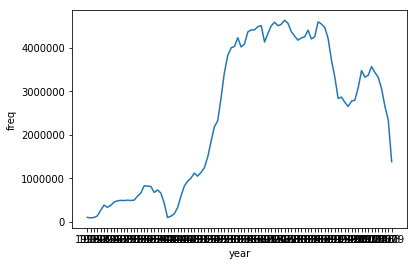

In [57]:
plt.plot(norm.iloc[0, 1:-3])
plt.xlabel('year')
plt.ylabel('freq')

In [180]:
indexes

[190,
 34,
 52,
 38,
 32,
 29,
 26,
 39,
 115,
 218,
 66,
 82,
 27,
 28,
 174,
 35,
 33,
 57,
 37,
 25,
 48,
 197,
 41,
 30,
 31,
 47,
 101,
 78,
 44,
 45,
 69,
 40,
 50,
 89,
 166,
 58,
 76,
 36,
 70,
 51,
 42,
 81,
 63,
 68,
 49,
 61,
 43,
 64,
 53,
 59,
 62,
 88,
 277,
 188,
 67,
 65,
 46,
 228,
 73,
 55,
 79,
 99,
 133,
 143,
 60,
 177,
 104,
 205,
 290,
 56,
 83,
 77,
 72,
 92,
 86,
 54,
 97,
 108,
 90,
 74,
 85,
 179,
 338,
 127,
 71,
 340,
 124,
 160,
 154,
 113,
 114,
 112,
 111,
 110,
 120,
 165,
 233,
 80,
 87,
 130,
 148,
 134,
 131,
 155,
 126,
 106,
 137,
 953,
 259,
 102,
 93,
 414,
 109,
 105,
 417,
 139,
 156,
 162,
 300,
 100,
 91,
 152,
 153,
 140,
 492,
 132,
 129,
 149,
 95,
 117,
 367,
 94,
 247,
 96,
 103,
 119,
 648,
 336,
 358,
 551,
 380,
 168,
 254,
 344,
 183,
 199,
 98,
 178,
 123,
 122,
 75,
 84,
 206,
 135,
 406,
 167,
 159,
 116,
 198,
 1116,
 145,
 121,
 473,
 196,
 289,
 250,
 201,
 175,
 151,
 335,
 871,
 163,
 191,
 192,
 150,
 320,
 200,
 138,
 176,


In [245]:
norm[norm.lemma.str.contains('добавл')]

,lemma,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2003,2004,2005,2006,2007,2008,2009,is_bastard,freq_sum,max_diff
81,добавлять,709.0,562.0,866.0,1025.0,2558.0,4238.0,3220.0,4003.0,4616.0,...,77724.0,79136.0,74723.0,75235.0,72473.0,71171.0,38717.0,False,3691487.0,32454.0
204,добавление,31.0,139.0,135.0,158.0,353.0,702.0,771.0,849.0,1336.0,...,10316.0,10626.0,9993.0,9611.0,8747.0,8374.0,4339.0,False,1080765.0,7689.0
428,добавляться,13.0,20.0,39.0,39.0,73.0,110.0,153.0,178.0,344.0,...,7140.0,7055.0,6693.0,6488.0,5628.0,4731.0,2755.0,False,346313.0,1976.0
6584,добавль,6.0,0.0,3.0,5.0,6.0,3.0,4.0,5.0,7.0,...,34.0,37.0,27.0,31.0,59.0,45.0,24.0,True,3436.0,64.0
6765,добавл,0.0,1.0,0.0,0.0,1.0,7.0,3.0,13.0,5.0,...,72.0,19.0,19.0,708.0,755.0,16.0,4.0,True,3285.0,739.0
16853,добавлеша,18.0,17.0,14.0,4.0,22.0,18.0,16.0,15.0,16.0,...,2.0,2.0,1.0,1.0,2.0,5.0,0.0,True,652.0,28.0
19738,добавлешя,14.0,10.0,7.0,8.0,14.0,15.0,11.0,6.0,28.0,...,0.0,1.0,2.0,2.0,1.0,1.0,0.0,non_word,486.0,40.0
20794,добавлеш,15.0,17.0,10.0,6.0,32.0,13.0,10.0,9.0,6.0,...,3.0,1.0,2.0,0.0,0.0,1.0,0.0,True,444.0,26.0
22974,добавлень,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,6.0,5.0,4.0,4.0,9.0,4.0,2.0,True,367.0,14.0
29711,добавленний,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,226.0,24.0


добавлять


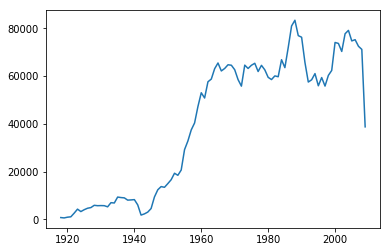

In [244]:
n = indexes[41]
#plt.plot(norm.iloc[n,1:-3].index.map(int), list(norm.iloc[n, 1:-3]))
plt.plot(norm.iloc[n,1:-3].index.map(int), list(norm.iloc[n, 1:-3]))
print (norm.iloc[n]['lemma'])

In [240]:
norm.iloc[n, 1:-3].diff().sort_values()

2009   -32616
1991   -31077
1990   -28188
1992   -20138
1964   -16203
1989   -16112
1988   -12750
1968   -11871
2007   -11394
1979   -11158
1971    -9821
2008    -9194
1978    -7411
1983    -6641
1942    -5998
2004    -5934
1941    -5107
1993    -4883
2005    -3884
2006    -2919
1995    -2686
2001    -2563
1940    -2475
1937    -2096
1938    -1631
1951    -1593
1928     -723
1986     -259
1930      -88
1921       10
        ...  
1996     3553
1998     3815
1962     4332
1984     4368
1946     4418
1969     4452
1981     4598
1963     4813
1975     4847
2003     5838
1947     7297
1954     7452
1985     7717
1966     8027
1972     8587
1955     9331
1973     9411
1957     9536
1970    10695
1976    11146
1961    11411
1999    11916
1974    12557
1958    12639
2000    13021
1960    13237
1959    14115
1977    16378
1967    18283
1918      NaN
Name: 42, Length: 92, dtype: object

In [35]:
rel_count = pd.read_csv('ngram_stats.csv')

In [132]:
rel_count = rel_count[rel_count.year > 1917]

In [133]:
rel_count.year.unique()

array([1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009])

In [134]:
rel_freq_list = list(rel_count.match_count)

In [135]:
norm.iloc[:, 1:-2].columns

Index(['1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926',
       '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935',
       '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'],
      dtype='object')

In [136]:
len(rel_freq_list)

92

In [139]:
# count relative frequencies
norm.iloc[:, 1:-2] / rel_freq_list * 10000

,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
43508,39.036796,39.356875,36.373007,35.477915,34.025147,33.741542,37.896740,34.680425,37.147270,34.409709,...,31.082039,30.450980,31.228572,30.770120,30.622320,30.345192,30.883389,30.778072,29.840078,29.342834
66555,19.034684,19.299043,18.594446,16.949550,16.873426,16.613640,17.832742,16.572262,15.652660,16.106801,...,14.988723,14.730037,14.796482,14.790860,14.778876,14.222450,14.689155,14.484840,14.451437,14.647160
332,11.398194,11.893934,10.958412,10.862813,11.052182,11.462212,11.228879,11.958495,12.156117,12.185839,...,6.901377,6.725841,6.576387,6.674572,6.678865,6.576033,6.625581,6.595808,6.627034,6.549881
1675,11.271075,10.327203,10.172690,9.781472,9.499513,9.003949,7.580941,7.932847,7.598429,7.556418,...,6.623316,6.628757,6.534666,6.753650,6.886036,6.954958,7.093802,7.202841,7.397677,7.299578
21746,10.394501,8.398058,8.899148,11.176410,10.803583,9.730924,9.438253,9.417237,8.505084,7.890511,...,7.926561,7.793331,7.717408,7.894974,8.018473,8.123189,8.023098,8.130874,7.906838,8.460057
52828,9.783083,11.543587,11.356859,10.138661,9.313680,9.337986,10.526170,9.148566,8.945544,8.924462,...,6.274579,5.960837,6.306336,6.357934,6.197171,5.944224,6.209961,6.305734,6.595860,6.330221
8116,8.342272,8.265784,8.992244,8.711492,9.227702,8.791235,9.351083,9.172899,9.708677,9.029090,...,8.777367,8.763949,8.621396,8.694668,8.843060,8.749100,8.723851,8.684890,8.544551,8.314772
19066,6.706494,10.763796,11.257806,8.843588,10.092932,12.601584,12.050165,12.250672,10.929015,12.146998,...,10.390731,9.672041,10.218808,10.067830,10.160099,9.461847,9.843199,9.657206,10.076119,10.097767
66272,6.028787,6.192300,6.670451,6.282239,6.068935,6.130384,5.083966,5.142017,4.911788,4.670913,...,5.238953,5.270748,5.072029,5.146501,5.217507,5.265412,5.312011,5.332048,5.466282,5.484666
70224,4.402758,4.275667,4.236945,5.338543,4.254959,4.214204,3.027733,3.242409,3.122482,3.329743,...,2.676423,2.530684,2.427588,2.507485,2.570181,2.579672,2.655581,2.729260,2.957783,3.020080


In [133]:
#rel_freq_list

# new_df = pd.pivot(df_short, index='ngram', columns='year', values='freq1') #index='ngram'

## Это одно и то же

In [241]:
df.head().groupby(['ngram', 'year']).freq1.count().unstack()

year,1980,1983,1988,1990,1993
ngram,,,,,
Д.Боровского,1,1,1,1,1


In [247]:
df.head().pivot(index='ngram', columns='year', values='freq1')

year,1980,1983,1988,1990,1993
ngram,,,,,
Д.Боровского,9,1,5,13,1


## Дальше

## Get relative frequencies